In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import statistics 
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import imblearn.over_sampling
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

#######################
#       imports       #
#######################

import xgboost as xgb
from xgboost.sklearn import XGBClassifier  
#from xgboost.sklearn import XGBRegressor

sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [3]:
r=pd.read_csv('winequality-red.csv',  sep=';')

In [5]:
r['wine type']='red'

In [8]:
#create classifier categories
classify=[]
for x in r.quality:
    if x>6:
        classify.append(1) 
    if x<7:
        classify.append(0)
#print(len(classify))    

r['quality']=classify

In [2]:
w=pd.read_csv('winequality-white.csv', sep=';')

In [184]:
w['wine type']='white'

In [9]:
r.to_csv('r.csv')

In [12]:
w.to_csv('w.csv')

In [11]:
classify=[]
for x in w.quality:
    if x>6:
        classify.append(1) 
    if x<7:
        classify.append(0)
#print(len(classify))    

w['quality']=classify

In [4]:
rw_df= pd.concat([r, w])

In [99]:
#adding feature
taste=[]
for sugar in rw_df['residual sugar']:
    if sugar<6:
        taste.append('dry')
    if 6<=sugar<21:
        taste.append('off-dry')
    if sugar>21:
        taste.append('sweet')
rw_df['residual sugar classification']=taste


In [100]:
rw_df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,residual sugar classification
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,dry
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,dry
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,dry
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,dry
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,dry
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,dry
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,dry
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red,dry
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red,dry
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,off-dry


In [101]:
len(rw_df)

6497

In [5]:
classify=[]
for x in rw_df.quality:
    if x>6:
        classify.append(1) 
    if x<7:
        classify.append(0)
#print(len(classify))    

rw_df['quality']=classify

In [6]:
rw_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


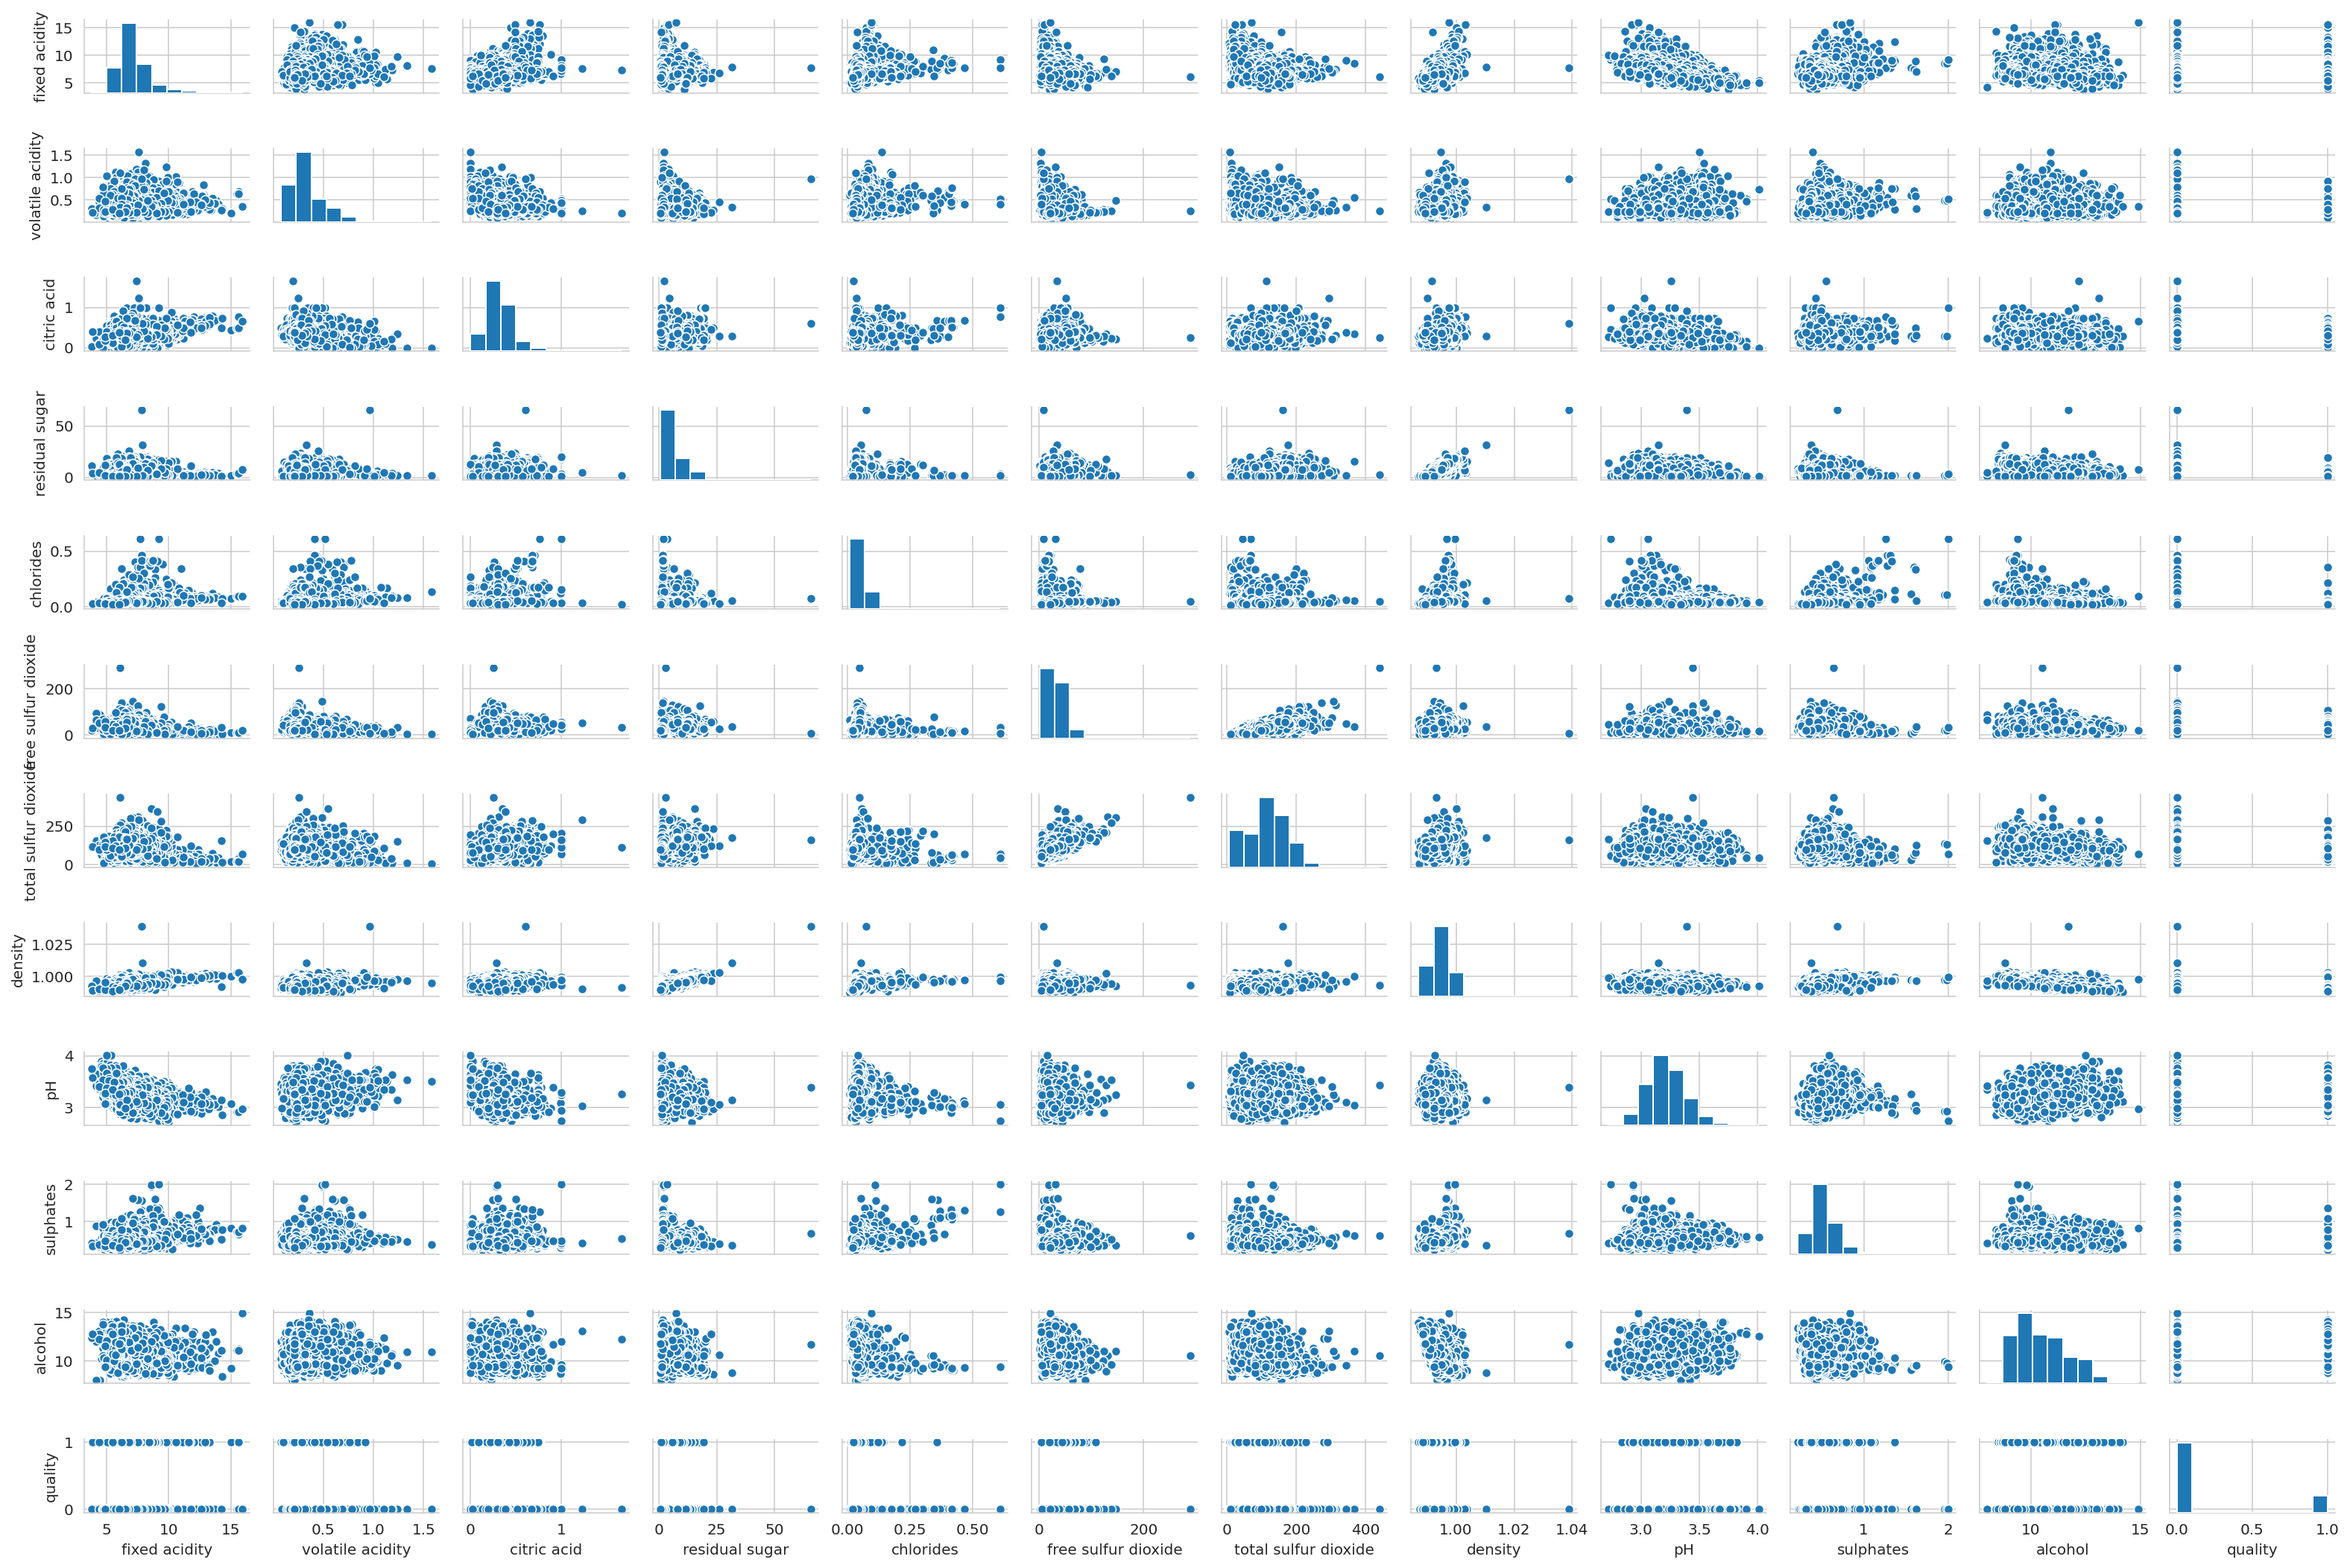

In [104]:
sns.pairplot(rw_df, height=1.2, aspect=1.5);

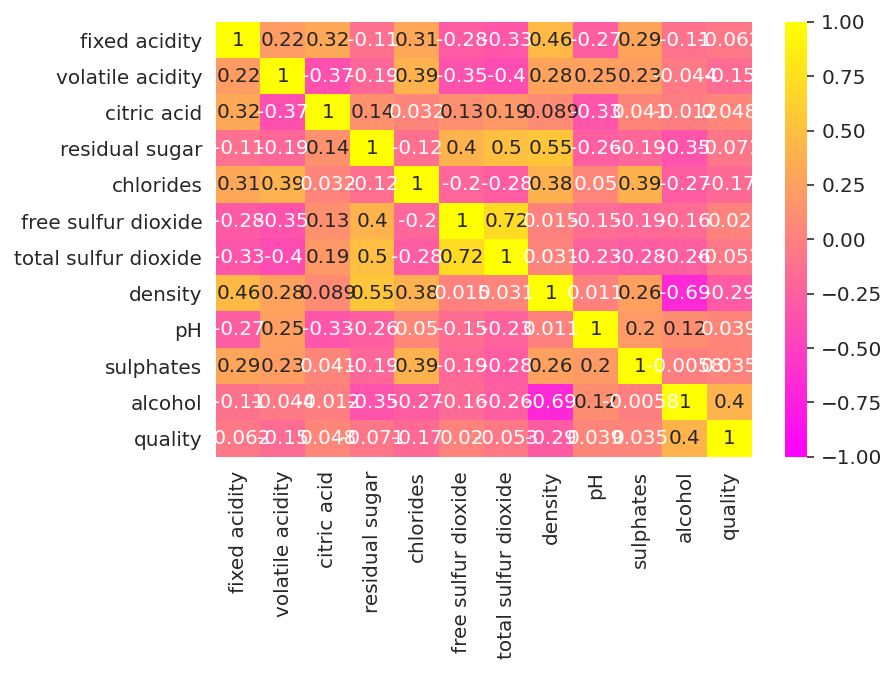

In [258]:
sns.heatmap(train.corr(), cmap="spring", annot=True, vmin=-1, vmax=1);

In [7]:
train, test = train_test_split(rw_df,test_size=.2,random_state=21)

In [8]:
X=train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
'pH', 'sulphates','alcohol', 'density']]
y=train['quality']

In [9]:
#X['fa/alc'] = X['fixed acidity']/X['alcohol']
X['volatile/fixed_acid'] = X['volatile acidity']/X['fixed acidity']
X['densitysq']=X['density']**2
X['fixed_acid/20'] = X['fixed acidity']/20

In [135]:
rw_features=rw_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
'pH', 'sulphates','alcohol', 'density']]
rw_features.to_csv('rw_features.csv')



array([0.53809524, 0.49047619, 0.56666667, 0.4952381 , 0.51904762])

In [136]:
train_x, val_x, train_y, val_y=train_test_split(X,y, test_size=.2,random_state=21)

In [137]:
train_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,density,volatile/fixed_acid,densitysq,fixed_acid/20
169,9.8,0.42,0.48,9.85,0.034,5.0,110.0,2.87,0.29,10.0,0.99580,0.042857,0.991618,0.490
3236,6.9,0.22,0.39,6.00,0.035,44.0,141.0,3.11,0.33,12.5,0.99123,0.031884,0.982537,0.345
2635,8.2,0.32,0.26,2.10,0.062,26.0,87.0,3.10,0.47,12.8,0.98974,0.039024,0.979585,0.410
628,8.7,0.54,0.26,2.50,0.097,7.0,31.0,3.27,0.60,9.3,0.99760,0.062069,0.995206,0.435
1410,6.6,0.96,0.00,1.80,0.082,5.0,16.0,3.50,0.44,11.9,0.99360,0.145455,0.987241,0.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,9.9,0.63,0.24,2.40,0.077,6.0,33.0,3.09,0.57,9.4,0.99740,0.063636,0.994807,0.495
1061,7.0,0.21,0.28,7.50,0.070,45.0,185.0,3.34,0.55,9.4,0.99660,0.030000,0.993212,0.350
2063,7.6,0.18,0.36,2.40,0.049,38.0,123.0,3.60,0.46,10.3,0.99600,0.023684,0.992016,0.380
1800,7.6,0.30,0.22,10.20,0.049,57.0,191.0,3.08,0.40,9.3,0.99660,0.039474,0.993212,0.380


In [138]:
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

In [111]:
sum(y==1)

1050

In [112]:
sum(y==0)

4147

In [131]:
#testing several models
lgr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(class_weight='balanced')
knn = KNeighborsClassifier()
g = GaussianNB()
svc=SVC(probability=True)
#gbmm = XGBClassifier(scale_pos_weight=2)
models=[rf]
def model_testing(X,y):
    #train_x, val_x, train_y, val_y=train_test_split(X,y, test_size=.2,random_state=21)
    for model in models:
        print(model, 'score' ,cross_val_score(model,X,y).mean())
        print ('precision',cross_val_score(model, X,y, scoring='precision').mean())
        print ('recall' ,cross_val_score(model, X,y, scoring='recall').mean())
        print ('f1',cross_val_score(model, X,y, scoring='f1').mean())


In [132]:
model_testing(X,y)

RandomForestClassifier(class_weight='balanced') score 0.8745431998223143
precision 0.7994860048452915
recall 0.5219047619047619
f1 0.6266956848687208


TypeError: 'str' object is not callable

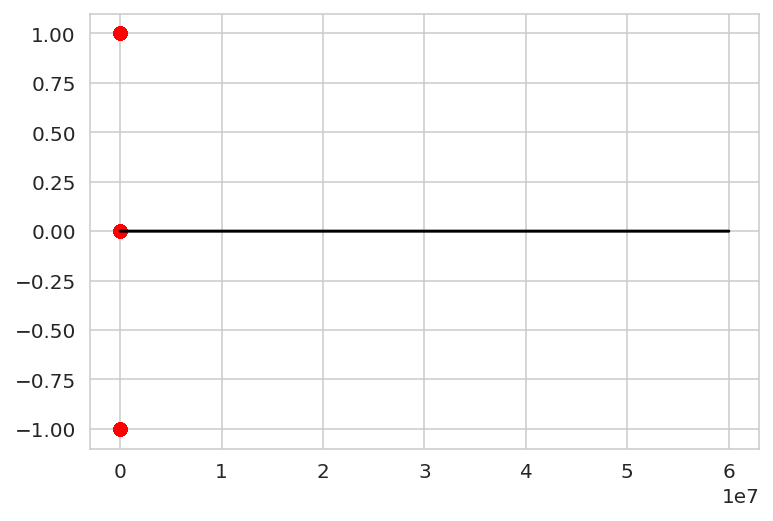

In [116]:
    # fit linear regression to training data
rff = RandomForestClassifier(class_weight='balanced')
rff.fit(train_x, train_y)
y_pred = rff.predict(val_x)

plt.scatter(y_pred,val_y-y_pred,alpha=.5, color='red')
plt.plot(np.linspace(0,60000000,10000),np.linspace(0,0,10000), color='black')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

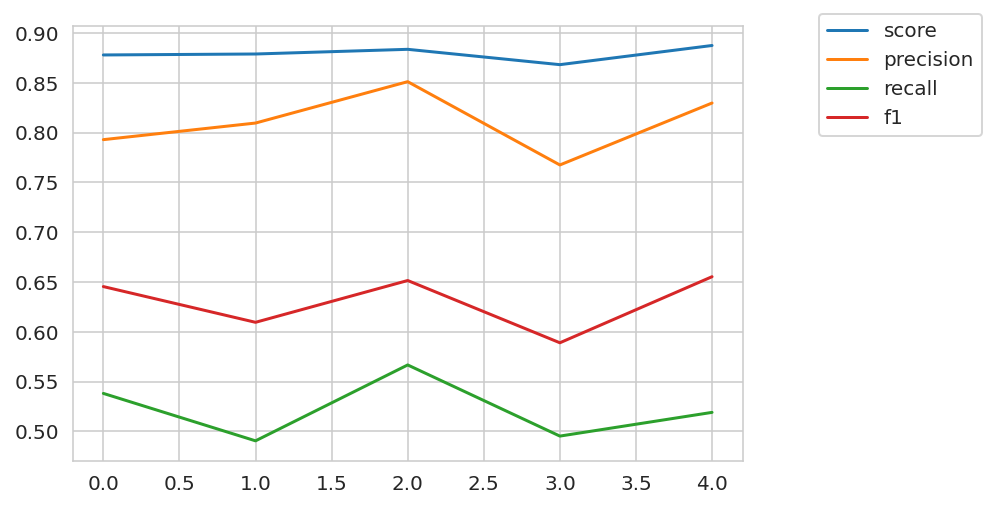

In [176]:
s=cross_val_score(rff,X,y)
p=cross_val_score(rff, X,y, scoring='precision')
r=cross_val_score(rff, X,y, scoring='recall')
f=cross_val_score(rff, X,y, scoring='f1')
plt.plot(s, label='score')
plt.plot(p, label='precision')
plt.plot(r, label='recall')
plt.plot(f, label='f1')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('static/scores.png')

In [119]:
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

In [120]:
rfc = RandomForestClassifier(n_estimators=100, class_weight='balanced')
quick_test_afew_times(rfc, X, y)

0.8725641025641024

In [ ]:
cf=RandomForestCLassifier()
f=cf.fit(X,y)
predicted=f.predict()
cm=confusion_matrix(y_test, predicted)


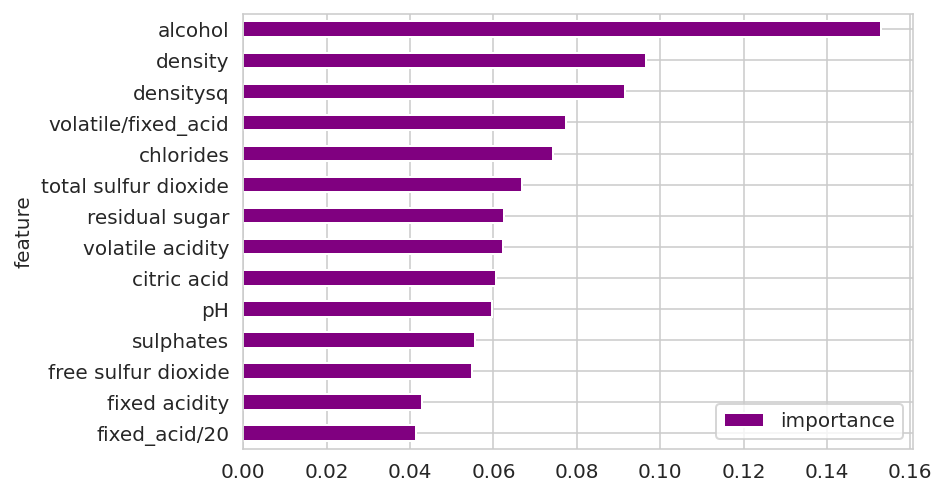

In [178]:
feat_imps = list(zip(train_x.columns,rff.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh', color='purple')
plt.savefig('static/importance.png')

In [18]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

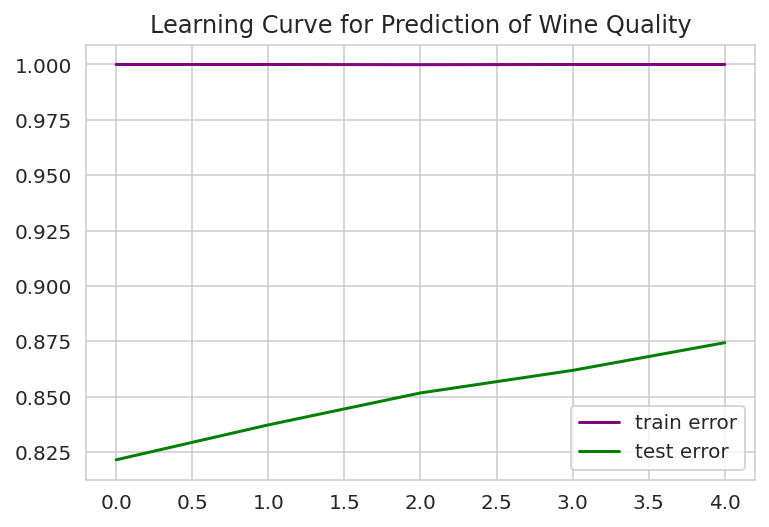

In [123]:
train_sizes2, train_scores2, test_scores2 = learning_curve(rff, std_scale.fit_transform(X),y)
train_cv_err2 = np.mean(train_scores2, axis = 1)
test_cv_err2 = np.mean(test_scores2, axis = 1)
plt.plot(train_cv_err2, label="train error", color='purple')
plt.plot(test_cv_err2, label='test error', color='green')
plt.title('Learning Curve for Prediction of Wine Quality')
plt.legend()

TypeError: 'str' object is not callable

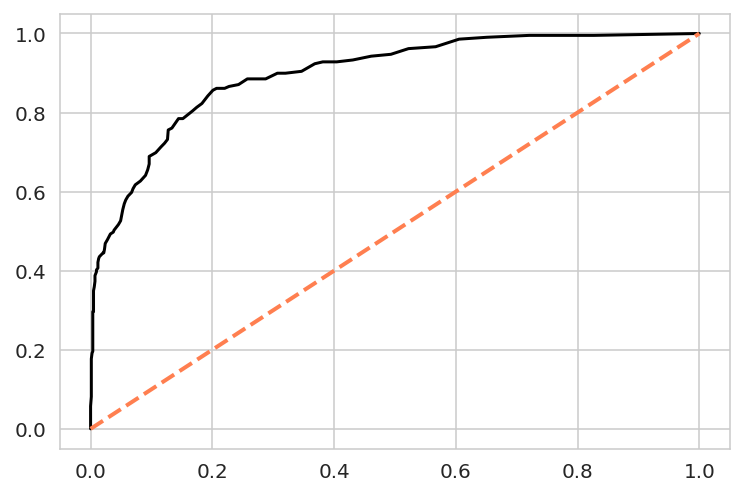

In [124]:
fpr, tpr, thresholds = roc_curve(val_y, rff.predict_proba(val_x)[:,1],pos_label=1)
plt.plot(fpr, tpr, color='black')
plt.plot([0,1],[0,1], color='coral', lw=2, linestyle='--')



plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve');

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [39]:
def wine_prediction_all(rw_df):
    X=rw_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'pH', 'sulphates','alcohol', 'density']]
    X['volatile/fixed_acid'] = X['volatile acidity']/X['fixed acidity']
    X['densitysq']=X['density']**2
    X['fixed/20']=X['fixed acidity']/20
    
    y=rw_df['quality']
    
    train_x, test_x, train_y, test_y=train_test_split(X,y, test_size=.2,random_state=21)
    rfc = RandomForestClassifier(class_weight='balanced',  oob_score = True)
    rfm=rfc.fit(train_x, train_y)
    rf_pred=rfm.predict(test_x)
    
    score = accuracy_score(test_y, rf_pred)
    recall = recall_score(test_y, rf_pred ,pos_label=1)
    precision = precision_score(test_y, rf_pred ,pos_label=1)
    f1 = f1_score(test_y, rf_pred ,pos_label=1)
    auc=roc_auc_score(test_y, rfc.predict_proba(test_x)[:,1])
    print('score: ', score, ' recall: ', recall,' precision: ', precision, ' f1: ', f1, ' auc: ', auc)
    print(rfc.oob_score_)
    
    cm=confusion_matrix(test_y, rf_pred)
    print('cm', cm)
    ax= plt.subplot()
   
    sns.heatmap(cm, annot=True, ax = ax, cmap=plt.cm.Blues); #annot=True to annotate cells
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    #ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

    
    plot1 = plt.figure(1)
    #feature importance
    feat_imps = list(zip(train_x.columns,rfc.feature_importances_))
    feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
    feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

    feat_imps.plot(x='feature',y='importance',kind='barh', color='pink');
    
    
    plot3 = plt.figure(3)
    #Learning Curve
    train_sizes2, train_scores2, test_scores2 = learning_curve(rfc, std_scale.fit_transform(X),y)
    train_cv_err2 = np.mean(train_scores2, axis = 1)
    train_std = np.std(train_scores2, axis=1)
    
    test_cv_err2 = np.mean(test_scores2, axis = 1)
    test_std = np.std(test_scores2, axis=1)
    
    plt.plot(train_cv_err2, label="train error")
    plt.plot( test_cv_err2, label='test error')
    plt.xlim=([0,7])
    plt.legend();
    
    plot4 = plt.figure(4)
    #ROC Curve
    fpr, tpr, thresholds = roc_curve(test_y, rfc.predict_proba(test_x)[:,1],pos_label=1)
    plt.plot(fpr, tpr, color='black')
    plt.plot([0,1],[0,1], color='coral', lw=2, linestyle='--')



    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest ROC curve');

RandomForestClassifier(class_weight='balanced') score 0.8776227141482196
precision 0.8053080530479756
recall 0.519047619047619
f1 0.622256541589539

Out of bag error is simply error computed on samples not seen during training. ...
If you have many such models (like in random forest where you have many trees, each 
trained on its own boostrap sample) then you can average over these errors and get a 
estimate of the generalization error.

score:  0.9023076923076923  recall:  0.5814977973568282  precision:  0.8048780487804879  f1:  0.6751918158567776  auc:  0.9230470786752117
0.8833942659226477
cm [[1041   32]
 [  95  132]]


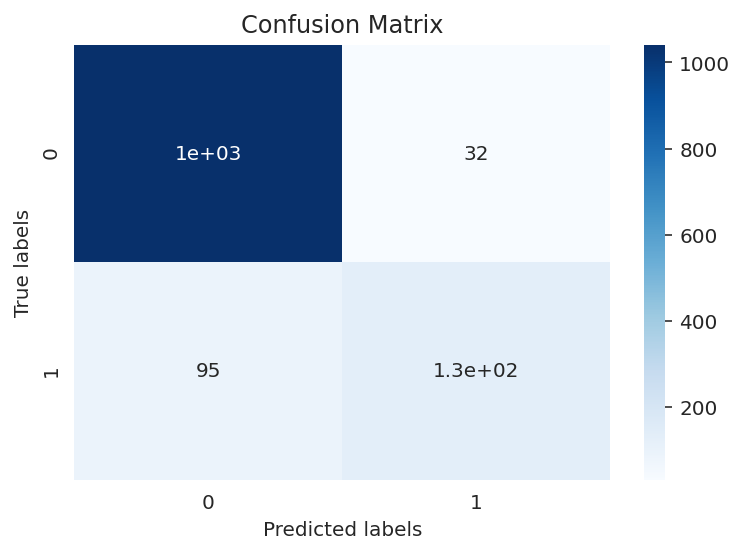

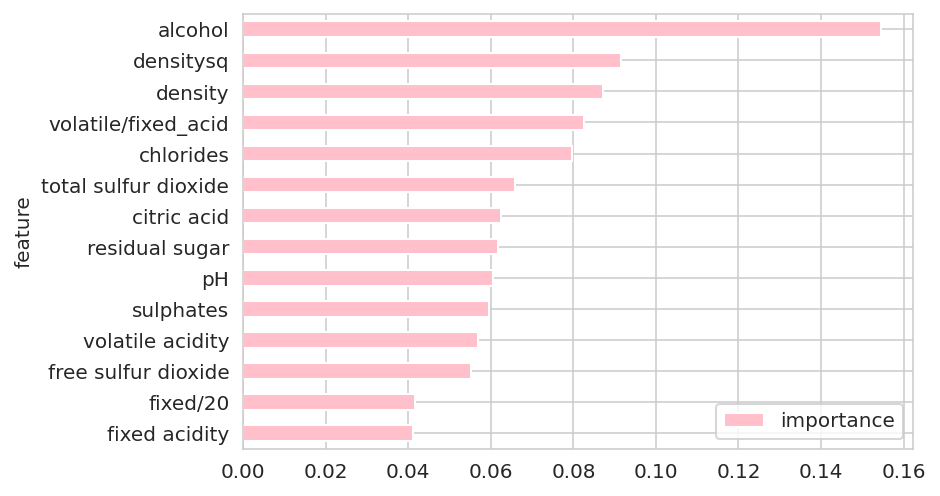

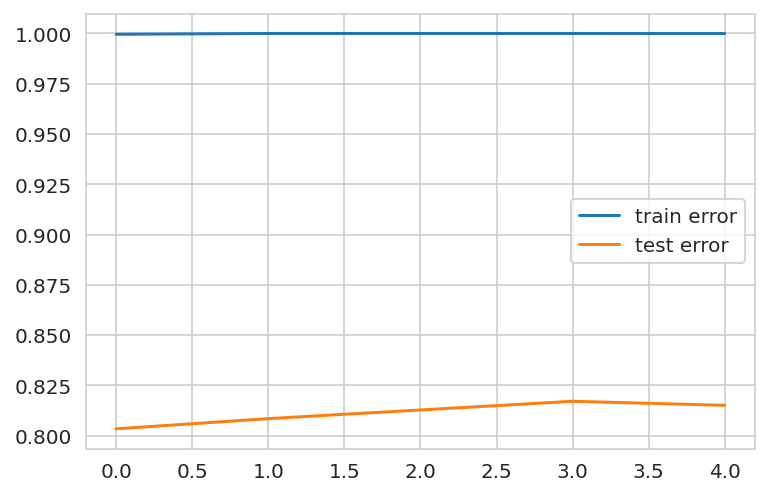

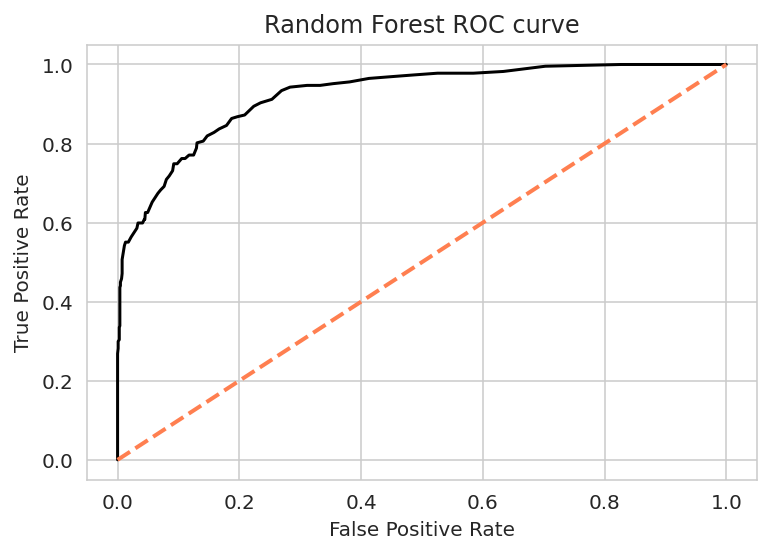

In [40]:
wine_prediction_all(rw_df)

In [36]:
classify_r=[]
for x in r.quality:
    if x>6:
        classify_r.append(1) 
    if x<7:
        classify_r.append(0)
    

r['quality']=classify_r

In [37]:
rX=r[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'pH', 'sulphates','alcohol', 'density']]
ry=r['quality']
rX['volatile/fixed_acid'] = rX['volatile acidity']/rX['fixed acidity']


<ipython-input-37-ef00200f3667>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rX['volatile/fixed_acid'] = rX['volatile acidity']/rX['fixed acidity']


In [38]:
sum(ry==1)

217

In [39]:
sum(ry==0)

1382

In [ ]:
3838+

In [57]:
lgr=LogisticRegression()
dt=DecisionTreeClassifier(class_weight='balanced')
rf=RandomForestClassifier(class_weight='balanced')
knn = KNeighborsClassifier(n_neighbors=10)
g = GaussianNB()
svc=SVC(probability=True)
gbmm = XGBClassifier(n_estimators=3000, #arbitrary large number
                       max_depth=12,
                       objective="binary:logistic",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=.3,
                       colsample_bytree=1, scale_pos_weight=6)
models=[gbmm]
def model_testing2(X,y):
    #train_x, val_x, train_y, val_y=train_test_split(X,y, test_size=.2,random_state=21)
    for model in models:
        print(model, 'score' ,cross_val_score(model,X,y).mean())
        print ('precision',cross_val_score(model, X,y, scoring='precision').mean())
        print ('recall' ,cross_val_score(model, X,y, scoring='recall').mean())
        print ('f1',cross_val_score(model, X,y, scoring='f1').mean())
model_testing2(rX,ry)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=1, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=12,
              min_child_weight=0.3, missing=nan, monotone_constraints=None,
              n_estimators=3000, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=6, subsample=1, tree_method=None,
              validate_parameters=None, verbosity=None) score 0.8536657523510971
precision 0.5605654761904761
recall 0.4280126849894292
f1 0.4286609025971833


In [ ]:
score 0.856171630094044
precision 0.5664697438996751
recall 0.42811839323467227
f1 0.4360627845674575

In [48]:
classify_w=[]
for x in w.quality:
    if x>6:
        classify_w.append(1) 
    if x<7:
        classify_w.append(0)
  

w['quality']=classify_w

In [49]:
wX=w[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'pH', 'sulphates','alcohol', 'density']]
wX['volatile/fixed_acid'] = wX['volatile acidity']/wX['fixed acidity']
wy=w['quality']

<ipython-input-49-204b2c90662c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wX['volatile/fixed_acid'] = wX['volatile acidity']/wX['fixed acidity']


In [ ]:
def wine_prediction_red():

In [50]:
sum(wy==0)

3838

In [51]:
sum(wy==1)

1060

In [56]:
lgr=LogisticRegression()

rf=RandomForestClassifier(class_weight='balanced')

gbmm = XGBClassifier(n_estimators=3000, 
                       max_depth=12,
                       objective="binary:logistic",
                       learning_rate=.2, 
                       subsample=1,
                       min_child_weight=.2,
                       colsample_bytree=1, scale_pos_weight=3)
models=[gbmm]
def model_testing3(X,y):
    #train_x, val_x, train_y, val_y=train_test_split(X,y, test_size=.2,random_state=21)
    for model in models:
        print(model, 'score' ,cross_val_score(model,X,y).mean())
        print ('precision',cross_val_score(model, X,y, scoring='precision').mean())
        print ('recall' ,cross_val_score(model, X,y, scoring='recall').mean())
        print ('f1',cross_val_score(model, X,y, scoring='f1').mean())
model_testing2(wX,wy)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=1, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=None, max_depth=12,
              min_child_weight=0.2, missing=nan, monotone_constraints=None,
              n_estimators=3000, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=3, subsample=1, tree_method=None,
              validate_parameters=None, verbosity=None) score 0.8060284338454482
precision 0.6190697009140734
recall 0.42075471698113204
f1 0.4813491263821669


In [ ]:
score 0.8060278084676158
precision 0.6241960393573297
recall 0.4226415094339623
f1 0.48170882133294474

In [48]:
yes=rw_df[rw_df["quality"]== 1]
no =rw_df[rw_df["quality"]== 0]

fixed acidity             7.085709
volatile acidity          0.289170
citric acid               0.334628
residual sugar            4.827721
chlorides                 0.044576
free sulfur dioxide      31.055208
total sulfur dioxide    109.891151
density                   0.993027
pH                        3.227651
sulphates                 0.541488
alcohol                  11.433359
quality                   1.000000
dtype: float64

fixed acidity             7.247011
volatile acidity          0.352019
citric acid               0.314720
residual sugar            5.593812
chlorides                 0.058837
free sulfur dioxide      30.395690
total sulfur dioxide    117.176533
density                   0.995105
pH                        3.216262
sulphates                 0.528768
alcohol                  10.261462
quality                   0.000000
dtype: float64

In [14]:
qual_examples=rw_df.loc[rw_df['quality'] == 1]

In [15]:
qual_examples

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,1,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,1,red
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,1,red
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,1,red
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,1,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4870,6.1,0.32,0.28,6.6,0.021,29.0,132.0,0.99188,3.15,0.36,11.45,1,white
4876,6.2,0.38,0.42,2.5,0.038,34.0,117.0,0.99132,3.36,0.59,11.60,1,white
4886,6.2,0.21,0.28,5.7,0.028,45.0,121.0,0.99168,3.21,1.08,12.15,1,white
4887,6.2,0.41,0.22,1.9,0.023,5.0,56.0,0.98928,3.04,0.79,13.00,1,white


In [35]:
#recommendation system
in_p=[7.3, 0.65, 0, 1, 0.065, 15, 21, 3.39, 0.47, 9.3, 0.9940]
def thing(in_p, rw_df):
    
    
    t3=rw_df.iloc[((rw_df['volatile acidity']/rw_df['fixed acidity'])-(in_p[1]/in_p[0])).abs().argsort()[:20]]
    t4=t3.iloc[(t3['alcohol']-in_p[9]).abs().argsort()[:15]]
    t=t4.iloc[(t4['volatile acidity']-in_p[1]).abs().argsort()[:10]]
    t2=t.iloc[(t['residual sugar']-in_p[3]).abs().argsort()[:5]]
    t5=t2.iloc[(t2['density']-in_p[7]).abs().argsort()[:3]]
    return t5
thing(in_p, qual_examples)           

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
1398,7.0,0.60,0.12,2.2,0.083,13.0,28.0,0.99660,3.52,0.62,10.2,1,red
958,6.4,0.57,0.12,2.3,0.120,25.0,36.0,0.99519,3.47,0.71,11.3,1,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,1,red


In [62]:
for index, row in r.iterrows():
    print (row[0])

7.4
7.8
7.8
11.2
7.4
7.4
7.9
7.3
7.8
7.5
6.7
7.5
5.6
7.8
8.9
8.9
8.5
8.1
7.4
7.9
8.9
7.6
7.9
8.5
6.9
6.3
7.6
7.9
7.1
7.8
6.7
6.9
8.3
6.9
5.2
7.8
7.8
8.1
5.7
7.3
7.3
8.8
7.5
8.1
6.8
4.6
7.7
8.7
6.4
5.6
8.8
6.6
6.6
8.6
7.6
7.7
10.2
7.5
7.8
7.3
8.8
7.7
7.5
7.0
7.2
7.2
7.5
6.6
9.3
8.0
7.7
7.7
7.7
8.3
9.7
8.8
8.8
6.8
6.7
8.3
6.2
7.8
7.4
7.3
6.3
6.9
8.6
7.7
9.3
7.0
7.9
8.6
8.6
7.7
5.0
4.7
6.8
7.0
7.6
8.1
8.3
7.8
8.1
8.1
7.2
8.1
7.8
6.2
8.0
8.1
7.8
8.4
8.4
10.1
7.8
9.4
8.3
7.8
8.8
7.0
7.3
8.8
7.3
8.0
7.8
9.0
8.2
8.1
8.0
6.1
8.0
5.6
5.6
6.6
7.9
8.4
8.3
7.2
7.8
7.8
8.4
8.3
5.2
6.3
5.2
8.1
5.8
7.6
6.9
8.2
7.3
9.2
7.5
7.5
7.1
7.1
7.1
7.1
7.1
6.8
7.6
7.6
7.8
7.4
7.3
7.8
6.8
7.3
6.8
7.5
7.9
8.0
8.0
7.4
7.3
6.9
7.3
7.5
7.0
8.8
8.8
8.9
7.2
6.8
6.7
8.9
7.4
7.7
7.9
7.9
8.2
6.4
6.8
7.6
7.6
7.8
7.3
11.5
5.4
6.9
9.6
8.8
6.8
7.0
7.0
12.8
12.8
7.8
7.8
11.0
9.7
8.0
11.6
8.2
7.8
7.0
8.7
8.1
7.5
7.8
7.8
7.4
6.8
8.6
8.4
7.7
8.9
9.0
7.7
6.9
5.2
8.0
8.5
6.9
8.2
7.2
7.2
7.2
7.2
8.2
8.9
12.0
7.7
15.0
15.0
7.3
7.1
8

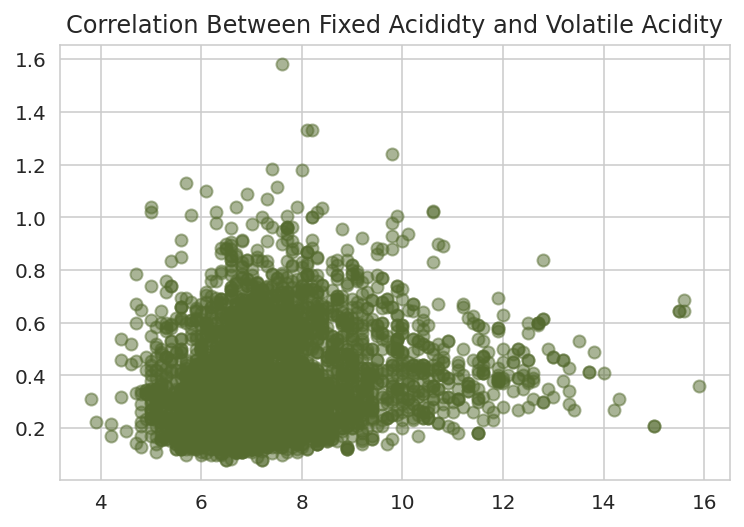

In [175]:
plt.scatter(rw_df['fixed acidity'],rw_df['volatile acidity'], alpha=.5, color='darkolivegreen')
plt.title('Correlation Between Fixed Acididty and Volatile Acidity')
plt.savefig('static/fava.png');

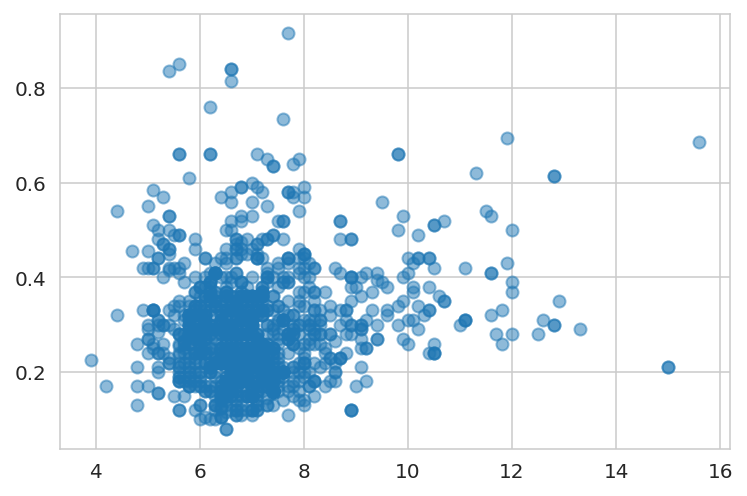

In [83]:

plt.scatter(qual_examples['fixed acidity'],qual_examples['volatile acidity'], alpha=.5)


Text(0.5, 1.0, 'Correlation Between Total and Free Sulfur Dioxide')

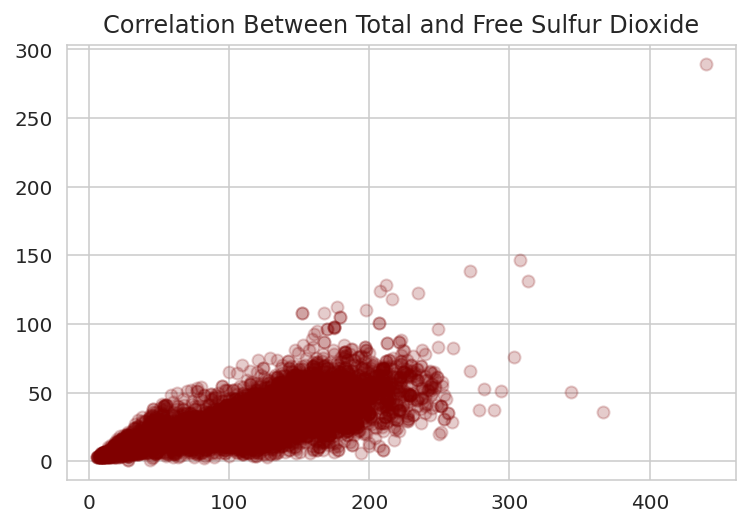

In [166]:
plt.scatter(rw_df['total sulfur dioxide'],rw_df['free sulfur dioxide'], alpha=.2, color='maroon')
plt.title('Correlation Between Total and Free Sulfur Dioxide')


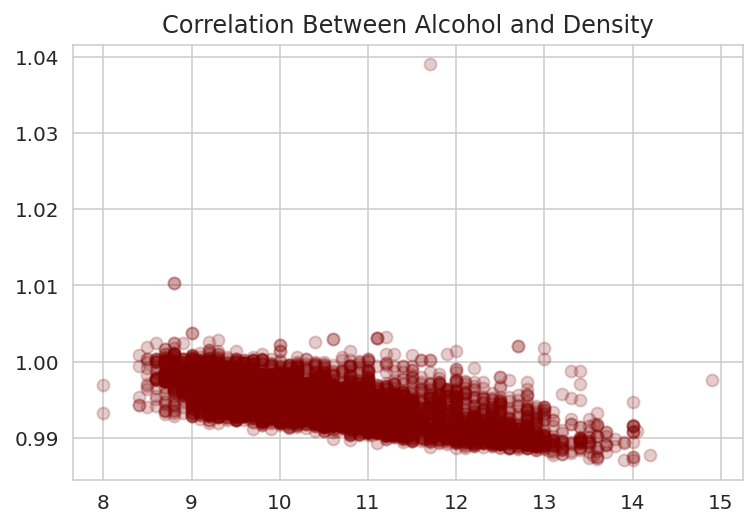

In [169]:
plt.scatter(rw_df['alcohol'],rw_df['density'], alpha=.2, color='maroon')
plt.title('Correlation Between Alcohol and Density')
plt.savefig('static/ad.png');

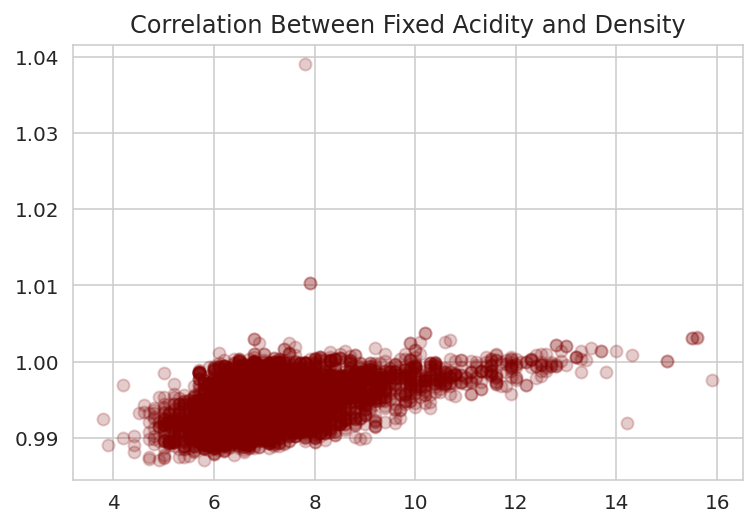

In [170]:
plt.scatter(rw_df['fixed acidity'],rw_df['density'], alpha=.2, color='maroon')
plt.title('Correlation Between Fixed Acidity and Density')
plt.savefig('static/fad.png')

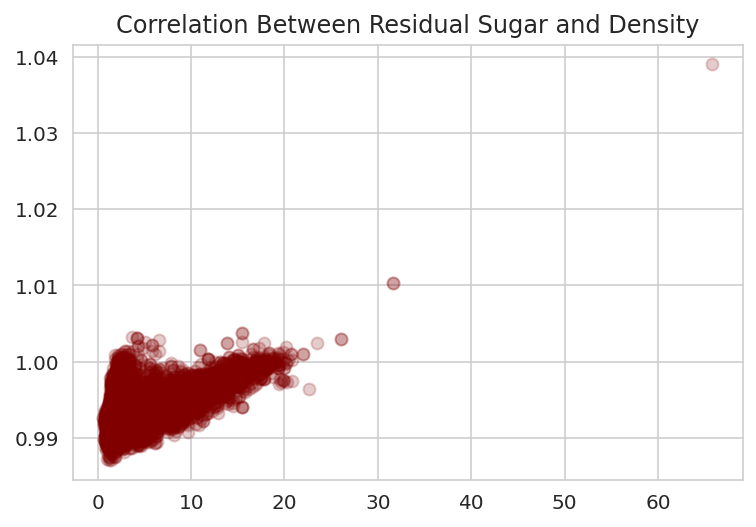

In [171]:
plt.scatter(rw_df['residual sugar'],rw_df['density'], alpha=.2, color='maroon')
plt.title('Correlation Between Residual Sugar and Density')
plt.savefig('static/rsd.png')

In [139]:
rw_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,residual sugar classification
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,red,dry
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,red,dry
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,red,dry
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,red,dry
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,red,dry


In [ ]:
to